In [1]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l
from torchvision import transforms
from torchvision import datasets
import matplotlib.pyplot as plt
import toastool

/Users/toastbook/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
data_tf = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.MNIST(root='./MNIST',train=True,transform=data_tf,download=True)

In [3]:
train_iter = torch.utils.data.DataLoader(train_dataset,batch_size=256,shuffle=True)

for X,y in train_iter:
    print(X.shape,y.shape)
    break

torch.Size([256, 1, 28, 28]) torch.Size([256])


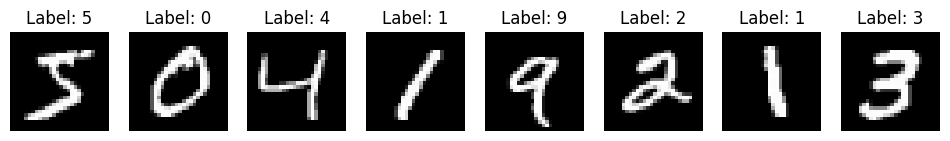

In [4]:
# 获取8个样本
mnist = train_dataset
num_samples = 8
samples = [mnist[i] for i in range(num_samples)]

# 绘制样本
fig, axes = plt.subplots(1, num_samples, figsize=(12, 12))
for i, (img, label) in enumerate(samples):
    axes[i].imshow(img.squeeze(), cmap='gray')
    axes[i].set_title(f'Label: {label}')
    axes[i].axis('off')

plt.show()

In [5]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(num_inputs, num_hiddens), 
                    nn.ReLU(), 
                    nn.Linear(num_hiddens, num_hiddens), 
                    nn.ReLU(), 
                    nn.Linear(num_hiddens, num_hiddens), 
                    nn.ReLU(), 
                    nn.Linear(num_hiddens, num_outputs))

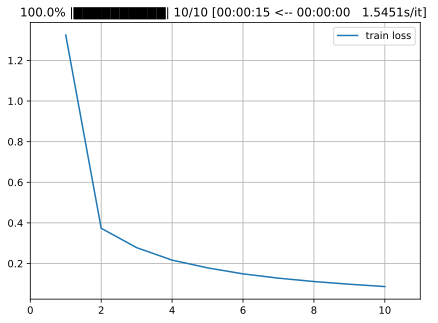

In [6]:
model = net
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
train_metrics = []
num_epochs = 10
for handle in toastool.Animator(10, legend=['train loss']):
    epoch_loss = 0
    for X, y in train_iter:
        y_hat = model(X)
        loss = F.cross_entropy(y_hat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    epoch_loss /= len(train_iter)
    train_metrics.append(epoch_loss)
    handle.y = epoch_loss

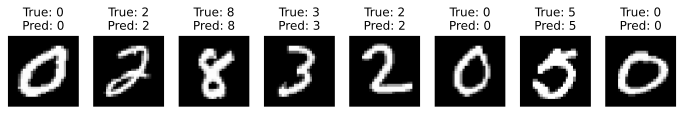

In [10]:
test_dataset = datasets.MNIST(root='./MNIST', train=False, download=False, transform=data_tf)

num_samples = 8
idx = torch.randint(0, len(test_dataset), (num_samples,))
samples = [test_dataset[i] for i in idx]
sample_images = torch.stack([s[0] for s in samples])
sample_labels = [s[1] for s in samples]

model.eval()
with torch.no_grad():
    predictions = model(sample_images)
    predicted_labels = torch.argmax(predictions, axis=1)

fig, axes = plt.subplots(1, num_samples, figsize=(12, 12))
for i, (img, true_label, pred_label) in enumerate(zip(sample_images, sample_labels, predicted_labels)):
    axes[i].imshow(img.squeeze(), cmap='gray')
    axes[i].set_title(f'True: {true_label}\nPred: {pred_label.item()}')
    axes[i].axis('off')

plt.show()

In [16]:
torch.save(model.state_dict(), 'net_linear.params')